# Basis generators

Author: Yoann Pradat

Affiliation: Uhlmann's lab, EMBL-EBI

Date: May, 29th 2019

In [1]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec
from matplotlib import lines
import scipy
plt.rcParams['text.usetex'] = True

cmap = cm.get_cmap('tab10')
colors = [cmap(i) for i in range(10)]
lines = list(lines.lineStyles.keys())

In [2]:
# For removing 0 from axis tick labels
func = lambda x, pos: "" if np.isclose(x,0) else "%.2g" % x

# Factorial recursive
def fact(n):
    if n==0:
        return 1
    else: 
        return n*fact(n-1)
    
# Kronecker
def delta(x, y):
    if x==y:
        return 1
    else: 
        return 0
    
# Numerical derivatives
def d_operator(f, x, r):
    if r==0:
        return f(x)
    else:
        eps = 1e-4
        return (d_operator(f, x+eps, r-1) - d_operator(f, x-eps, r-1))/(2*eps)

In [3]:
def format_ax(ax, title, loc='upper right', bbox_to_anchor=None):
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(func))
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(func))
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')    
    ax.tick_params(axis='both', labelsize=20)
    ax.legend(loc=loc, fontsize=20, bbox_to_anchor=bbox_to_anchor)
    ax.set_title(title, fontsize=30)

# I. Basis generators used in Romani Conti et al paper Ellipse-preserving Hermite interpolation and subdivion

In [4]:
def _Dg_1(w, x, order=1):
    assert 0 <= x
    if 1 < x:
        return 0
    else:
        qw = np.exp(w*1j)*(w*1j-2) + w*1j+2
        aw = (w*1j + 1 + np.exp(w*1j)*(w*1j-1))/qw
        bw = -w*1j*(np.exp(w*1j)+1)/qw
        cw = 1/qw
        dw = -np.exp(w*1j)/qw

        if order==0:
            return (aw + bw*x + cw*np.exp(w*x*1j) + dw*np.exp(-w*x*1j)).real
        elif order==1:
            return (bw + cw*w*1j*np.exp(w*x*1j) - dw*w*1j*np.exp(-w*x*1j)).real
        else:
            return (cw*(w*1j)**order*np.exp(w*x*1j) + dw*(-w*1j)**order*np.exp(-w*x*1j)).real

def _Dg_2(w, x, order=1):
    assert 0 <= x
    if 1 < x:
        return 0
    else:
        qw = np.exp(w*1j)*(w*1j-2) + w*1j+2
        pw = np.exp(2*w*1j)*(w*1j-1) + w*1j+1
        aw = pw/(w*1j*(np.exp(w*1j)-1)*qw)
        bw = -(np.exp(w*1j) -1)/qw
        cw = (np.exp(w*1j)-w*1j-1)/(w*1j*(np.exp(w*1j)-1)*qw)
        dw = -np.exp(w*1j)*(np.exp(w*1j)*(w*1j-1)+1)/(w*1j*(np.exp(w*1j)-1)*qw)

        if order==0:
            return (aw + bw*x + cw*np.exp(w*x*1j) + dw*np.exp(-w*x*1j)).real
        elif order==1:
            return (bw + cw*w*1j*np.exp(w*x*1j) - dw*w*1j*np.exp(-w*x*1j)).real
        else:
            return (cw*(w*1j)**order*np.exp(w*x*1j) + dw*(-w*1j)**order*np.exp(-w*x*1j)).real

In [5]:
def phi_1(w, x):
    if 1 <= np.abs(x):
        return 0
    else:
        qw = np.exp(w*1j)*(w*1j-2) + w*1j+2
        aw = (w*1j + 1 + np.exp(w*1j)*(w*1j-1))/qw
        bw = -w*1j*(np.exp(w*1j)+1)/qw
        cw = 1/qw
        dw = -np.exp(w*1j)/qw
        return (aw + bw*np.abs(x) + cw*np.exp(w*np.abs(x)*1j) + dw*np.exp(-w*np.abs(x)*1j)).real

def phi_2(w, x):
    if 1 <= np.abs(x):
        return 0
    else:
        qw = np.exp(w*1j)*(w*1j-2) + w*1j+2
        pw = np.exp(2*w*1j)*(w*1j-1) + w*1j+1
        aw = pw/(w*1j*(np.exp(w*1j)-1)*qw)
        bw = -(np.exp(w*1j) -1)/qw
        cw = (np.exp(w*1j)-w*1j-1)/(w*1j*(np.exp(w*1j)-1)*qw)
        dw = -np.exp(w*1j)*(np.exp(w*1j)*(w*1j-1)+1)/(w*1j*(np.exp(w*1j)-1)*qw)

        if 0 <= x:
            return (aw + bw*x + cw*np.exp(w*x*1j) + dw*np.exp(-w*x*1j)).real
        else:
            return (-aw + bw*x + -cw*np.exp(-w*x*1j) - dw*np.exp(w*x*1j)).real

### Functions

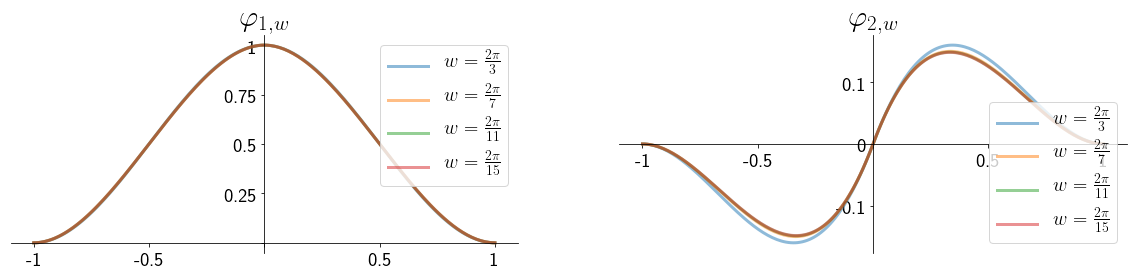

In [8]:
M = np.arange(3, 17, 4)
X = np.linspace(-1, 1, 200)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 4))
for m, color in zip(M, colors):
    ax[0].plot(X, [phi_1(2*np.pi/m, x) for x in X], lw=3, color=color, label=r'$w=\frac{2\pi}{%d}$' % m, alpha=0.5)
    ax[1].plot(X, [phi_2(2*np.pi/m, x) for x in X], lw=3, color=color, label=r'$w=\frac{2\pi}{%d}$' % m, alpha=0.5)

       
ax[0].xaxis.set_major_formatter(ticker.FuncFormatter(func))
ax[0].yaxis.set_major_formatter(ticker.FuncFormatter(func))
ax[0].spines['left'].set_position('center')
ax[0].spines['bottom'].set_position('zero')
ax[0].spines['right'].set_color('none')
ax[0].spines['top'].set_color('none')
ax[0].xaxis.set_ticks_position('bottom')
ax[0].yaxis.set_ticks_position('left')    

ax[0].tick_params(axis='both', labelsize=20)
ax[0].legend(loc='upper right', fontsize=20)
ax[0].set_title(r'$\varphi_{1,w}$', fontsize=30)

ax[1].yaxis.set_major_formatter(ticker.FuncFormatter(func))
ax[1].xaxis.set_major_formatter(ticker.FuncFormatter(func))
ax[1].spines['left'].set_position('center')
ax[1].spines['bottom'].set_position('zero')
ax[1].spines['right'].set_color('none')
ax[1].spines['top'].set_color('none')
ax[1].xaxis.set_ticks_position('bottom')
ax[1].yaxis.set_ticks_position('left')    
ax[1].yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2g'))

ax[1].tick_params(axis='both', labelsize=20)
ax[1].legend(loc='lower right', fontsize=20)
ax[1].set_title(r'$\varphi_{2,w}$', fontsize=30)

plt.show(fig)

### 1st derivative

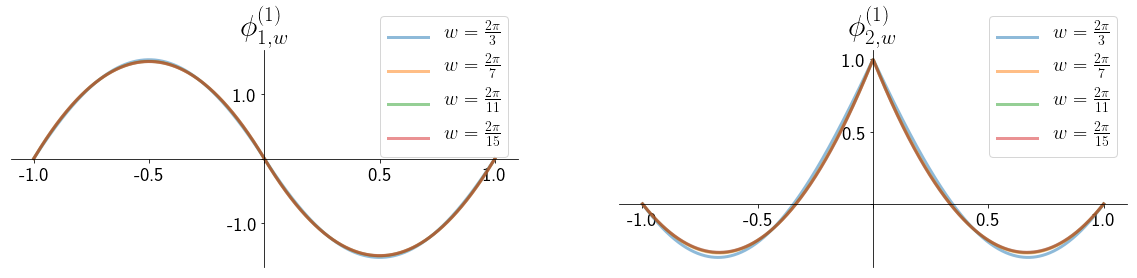

In [51]:
M = np.arange(3, 17, 4)
X = np.linspace(-1, 1, 1000)
r = 1

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 4))
for m, color in zip(M, colors):
    f1 = lambda x: phi_1(2*np.pi/m, x)
    f2 = lambda x: phi_2(2*np.pi/m, x)
    ax[0].plot(X, [d_operator(f1, x, r) for x in X], lw=3, color=color, label=r'$w=\frac{2\pi}{%d}$' % m, alpha=0.5)
    ax[1].plot(X, [d_operator(f2, x, r) for x in X], lw=3, color=color, label=r'$w=\frac{2\pi}{%d}$' % m, alpha=0.5)
    
ax[0].xaxis.set_major_formatter(ticker.FuncFormatter(func))
ax[0].yaxis.set_major_formatter(ticker.FuncFormatter(func))
ax[0].spines['left'].set_position('center')
ax[0].spines['bottom'].set_position('zero')
ax[0].spines['right'].set_color('none')
ax[0].spines['top'].set_color('none')
ax[0].xaxis.set_ticks_position('bottom')
ax[0].yaxis.set_ticks_position('left')

ax[0].tick_params(axis='both', labelsize=20)
ax[0].legend(loc='upper right', fontsize=20, bbox_to_anchor=(1, 1.2))
ax[0].set_title(r'$\phi_{1,w}^{(%d)}$' % r, fontsize=30)

ax[1].xaxis.set_major_formatter(ticker.FuncFormatter(func))
ax[1].yaxis.set_major_formatter(ticker.FuncFormatter(func))
ax[1].spines['left'].set_position('center')
ax[1].spines['bottom'].set_position('zero')
ax[1].spines['right'].set_color('none')
ax[1].spines['top'].set_color('none')
ax[1].xaxis.set_ticks_position('bottom')
ax[1].yaxis.set_ticks_position('left')

ax[1].tick_params(axis='both', labelsize=20)
ax[1].legend(loc='upper right', fontsize=20, bbox_to_anchor=(1, 1.2))
ax[1].set_title(r'$\phi_{2,w}^{(%d)}$' % r, fontsize=30)

plt.subplots_adjust(hspace=0.3)
plt.show(fig)

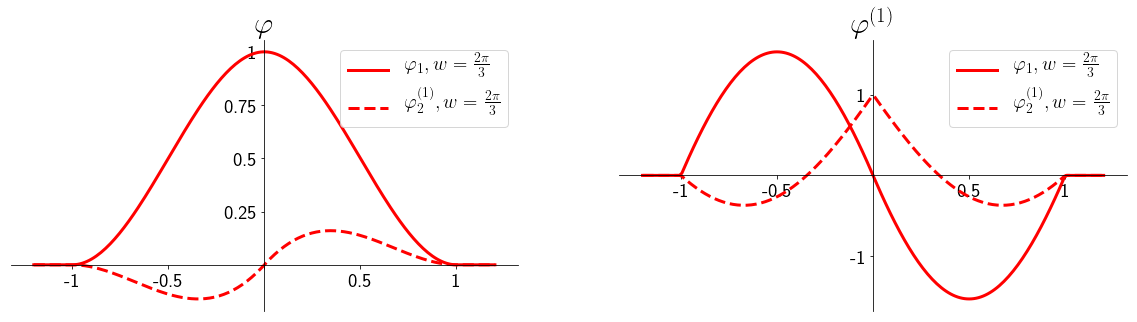

In [17]:
X = np.linspace(-1.2, 1.2, 200)
m = 3

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
    
for m, c in zip([3], ['red']):
    f1 = lambda x: phi_1(2*np.pi/m, x)
    f2 = lambda x: phi_2(2*np.pi/m, x)
    ax[0].plot(X, [f1(x) for x in X], color=c, lw=3, label=r'$\varphi_1, w=\frac{2\pi}{%d}$'  % m)
    ax[1].plot(X, [d_operator(f1, x, 1) for x in X], color=c, lw=3, label=r'$\varphi_1, w=\frac{2\pi}{%d}$'  % m)
    ax[0].plot(X, [f2(x) for x in X], color=c, lw=3, ls='--', label=r'$\varphi_2^{(1)}, w=\frac{2\pi}{%d}$'  % m)
    ax[1].plot(X, [d_operator(f2, x, 1) for x in X], color=c, ls='--', lw=3, label=r'$\varphi_2^{(1)}, w=\frac{2\pi}{%d}$'  % m)
    
ax[0].xaxis.set_major_formatter(ticker.FuncFormatter(func))
ax[0].yaxis.set_major_formatter(ticker.FuncFormatter(func))
ax[0].spines['left'].set_position('center')
ax[0].spines['bottom'].set_position('zero')
ax[0].spines['right'].set_color('none')
ax[0].spines['top'].set_color('none')
ax[0].xaxis.set_ticks_position('bottom')
ax[0].yaxis.set_ticks_position('left')    
ax[0].tick_params(axis='both', labelsize=20)
ax[0].legend(loc='upper right', bbox_to_anchor=(1.,1.2), fontsize=20)
ax[0].tick_params(axis='both', labelsize=20)
ax[0].legend(loc='best', fontsize=20)
ax[0].set_title(r'$\varphi$', fontsize=30)

ax[1].xaxis.set_major_formatter(ticker.FuncFormatter(func))
ax[1].yaxis.set_major_formatter(ticker.FuncFormatter(func))
ax[1].spines['left'].set_position('center')
ax[1].spines['bottom'].set_position('zero')
ax[1].spines['right'].set_color('none')
ax[1].spines['top'].set_color('none')
ax[1].xaxis.set_ticks_position('bottom')
ax[1].yaxis.set_ticks_position('left')  
ax[1].tick_params(axis='both', labelsize=20)
ax[1].legend(loc='lower right', bbox_to_anchor=(1, -.2), fontsize=20)
ax[1].tick_params(axis='both', labelsize=20)
ax[1].legend(loc='best', fontsize=20)
ax[1].set_title(r'$\varphi^{(1)}$', fontsize=30)

fig.savefig('../report/images/conti_phi_12.png')
plt.show(fig)

### 2nd derivative

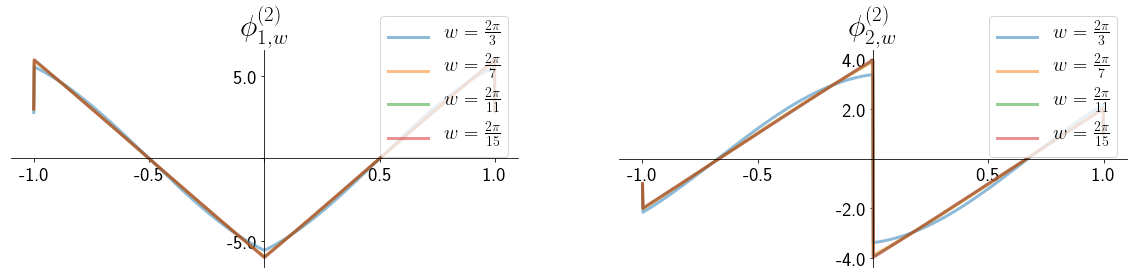

In [52]:
M = np.arange(3, 17, 4)
X = np.linspace(-1, 1, 1000)
r = 2

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 4))
for m, color in zip(M, colors):
    f1 = lambda x: phi_1(2*np.pi/m, x)
    f2 = lambda x: phi_2(2*np.pi/m, x)
    ax[0].plot(X, [d_operator(f1, x, r) for x in X], lw=3, color=color, label=r'$w=\frac{2\pi}{%d}$' % m, alpha=0.5)
    ax[1].plot(X, [d_operator(f2, x, r) for x in X], lw=3, color=color, label=r'$w=\frac{2\pi}{%d}$' % m, alpha=0.5)
    
ax[0].xaxis.set_major_formatter(ticker.FuncFormatter(func))
ax[0].yaxis.set_major_formatter(ticker.FuncFormatter(func))
ax[0].spines['left'].set_position('center')
ax[0].spines['bottom'].set_position('zero')
ax[0].spines['right'].set_color('none')
ax[0].spines['top'].set_color('none')
ax[0].xaxis.set_ticks_position('bottom')
ax[0].yaxis.set_ticks_position('left')

ax[0].tick_params(axis='both', labelsize=20)
ax[0].legend(loc='upper right', fontsize=20, bbox_to_anchor=(1, 1.2))
ax[0].set_title(r'$\phi_{1,w}^{(%d)}$' % r, fontsize=30)

ax[1].xaxis.set_major_formatter(ticker.FuncFormatter(func))
ax[1].yaxis.set_major_formatter(ticker.FuncFormatter(func))
ax[1].spines['left'].set_position('center')
ax[1].spines['bottom'].set_position('zero')
ax[1].spines['right'].set_color('none')
ax[1].spines['top'].set_color('none')
ax[1].xaxis.set_ticks_position('bottom')
ax[1].yaxis.set_ticks_position('left')

ax[1].tick_params(axis='both', labelsize=20)
ax[1].legend(loc='upper right', fontsize=20, bbox_to_anchor=(1, 1.2))
ax[1].set_title(r'$\phi_{2,w}^{(%d)}$' % r, fontsize=30)

plt.subplots_adjust(hspace=0.3)
plt.show(fig)

# II. Basis generators used in Virginie Uhlmann's Hermite Snakes with Control of Tangents

In [53]:
def hphi_1(x):
    if 1 <= np.abs(x):
        return 0
    else:
        return 1 - 3*x**2 + 2*np.abs(x)**3

def hphi_2(x):
    if 1 <= np.abs(x):
        return 0
    else:
        if 0 <= x:
            return x - 2*x**2 + x**3
        else:
            return x + 2*x**2 + x**3

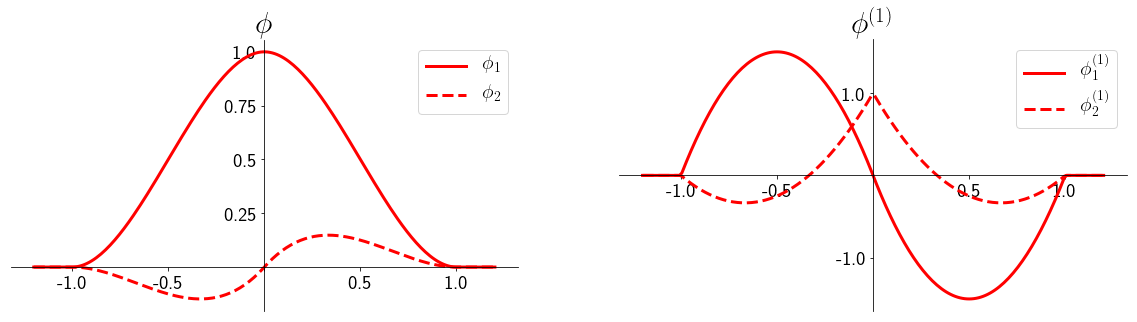

In [54]:
X = np.linspace(-1.2, 1.2, 200)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
ax[0].plot(X, [hphi_1(x) for x in X], color='red', lw=3, label=r'$\phi_1$')
ax[1].plot(X, [d_operator(hphi_1, x, 1) for x in X], color='red', lw=3, label=r'$\phi_1^{(1)}$')
ax[0].plot(X, [hphi_2(x) for x in X], color='red', lw=3, ls='--', label=r'$\phi_2$')
ax[1].plot(X, [d_operator(hphi_2, x, 1) for x in X], color='red', ls='--', lw=3, label=r'$\phi_2^{(1)}$')
    
ax[0].xaxis.set_major_formatter(ticker.FuncFormatter(func))
ax[0].yaxis.set_major_formatter(ticker.FuncFormatter(func))
ax[0].spines['left'].set_position('center')
ax[0].spines['bottom'].set_position('zero')
ax[0].spines['right'].set_color('none')
ax[0].spines['top'].set_color('none')
ax[0].xaxis.set_ticks_position('bottom')
ax[0].yaxis.set_ticks_position('left')    
ax[0].tick_params(axis='both', labelsize=20)
ax[0].legend(loc='upper right', bbox_to_anchor=(1.,1.2), fontsize=20)
ax[0].tick_params(axis='both', labelsize=20)
ax[0].legend(loc='best', fontsize=20)
ax[0].set_title(r'$\phi$', fontsize=30)

ax[1].xaxis.set_major_formatter(ticker.FuncFormatter(func))
ax[1].yaxis.set_major_formatter(ticker.FuncFormatter(func))
ax[1].spines['left'].set_position('center')
ax[1].spines['bottom'].set_position('zero')
ax[1].spines['right'].set_color('none')
ax[1].spines['top'].set_color('none')
ax[1].xaxis.set_ticks_position('bottom')
ax[1].yaxis.set_ticks_position('left')  
ax[1].tick_params(axis='both', labelsize=20)
ax[1].legend(loc='lower right', bbox_to_anchor=(1, -.2), fontsize=20)
ax[1].tick_params(axis='both', labelsize=20)
ax[1].legend(loc='best', fontsize=20)
ax[1].set_title(r'$\phi^{(1)}$', fontsize=30)

fig.savefig("../lab_meeting/presentation_1/hermite_uhl.png")
plt.show(fig)

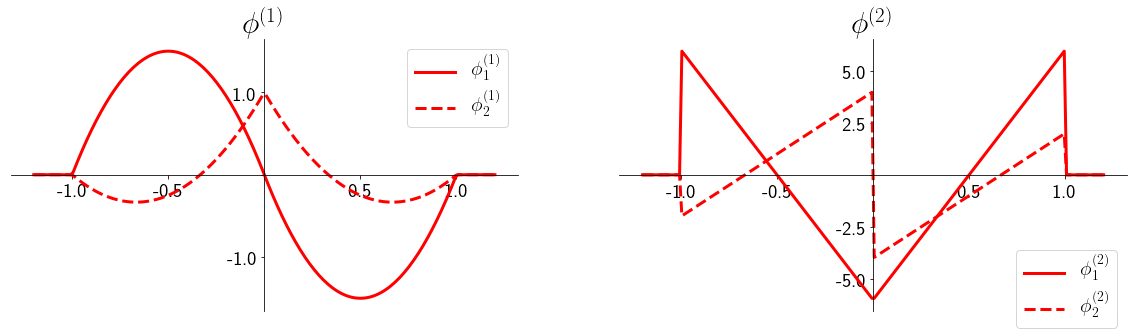

In [55]:
X = np.linspace(-1.2, 1.2, 200)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
ax[0].plot(X, [d_operator(hphi_1, x, 1) for x in X], color='red', lw=3, label=r'$\phi_1^{(1)}$')
ax[1].plot(X, [d_operator(hphi_1, x, 2) for x in X], color='red', lw=3, label=r'$\phi_1^{(2)}$')
ax[0].plot(X, [d_operator(hphi_2, x, 1) for x in X], color='red', lw=3, ls='--', label=r'$\phi_2^{(1)}$')
ax[1].plot(X, [d_operator(hphi_2, x, 2) for x in X], color='red', ls='--', lw=3, label=r'$\phi_2^{(2)}$')
    
ax[0].xaxis.set_major_formatter(ticker.FuncFormatter(func))
ax[0].yaxis.set_major_formatter(ticker.FuncFormatter(func))
ax[0].spines['left'].set_position('center')
ax[0].spines['bottom'].set_position('zero')
ax[0].spines['right'].set_color('none')
ax[0].spines['top'].set_color('none')
ax[0].xaxis.set_ticks_position('bottom')
ax[0].yaxis.set_ticks_position('left')    
ax[0].tick_params(axis='both', labelsize=20)
ax[0].legend(loc='upper right', bbox_to_anchor=(1.,1.), fontsize=20)
ax[0].set_title(r'$\phi^{(1)}$', fontsize=30)

ax[1].xaxis.set_major_formatter(ticker.FuncFormatter(func))
ax[1].yaxis.set_major_formatter(ticker.FuncFormatter(func))
ax[1].spines['left'].set_position('center')
ax[1].spines['bottom'].set_position('zero')
ax[1].spines['right'].set_color('none')
ax[1].spines['top'].set_color('none')
ax[1].xaxis.set_ticks_position('bottom')
ax[1].yaxis.set_ticks_position('left')  
ax[1].tick_params(axis='both', labelsize=20)
ax[1].legend(loc='lower right', bbox_to_anchor=(1, -.1), fontsize=20)
ax[1].set_title(r'$\phi^{(2)}$', fontsize=30)

fig.savefig("../notes/twist/hermite_order_2.png")
plt.show(fig)

# III. Comparison exponential and polynomial Hermites

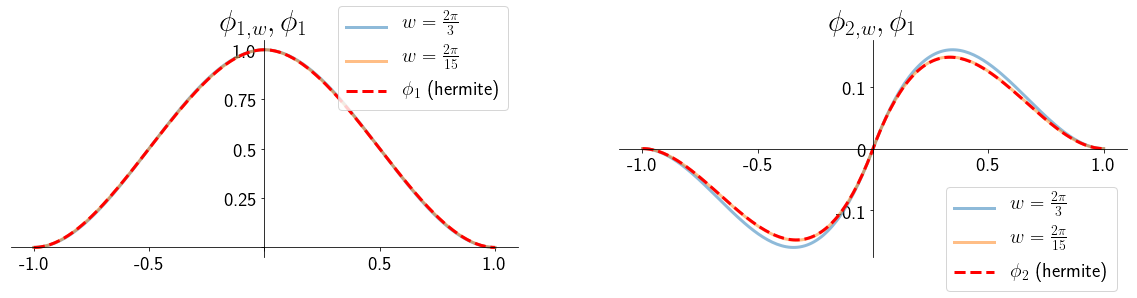

In [56]:
M = [3, 15]
X = np.linspace(-1, 1, 200)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 4))
for m, color in zip(M, colors):
    ax[0].plot(X, [phi_1(2*np.pi/m, x) for x in X], color=color, lw=3, label=r'$w=\frac{2\pi}{%d}$' % m, alpha=0.5)
    ax[1].plot(X, [phi_2(2*np.pi/m, x) for x in X], color=color, lw=3, label=r'$w=\frac{2\pi}{%d}$' % m, alpha=0.5)
    
ax[0].plot(X, [hphi_1(x) for x in X], ls='--', lw=3, color='red', label=r'$\phi_1$ (hermite)')
ax[1].plot(X, [hphi_2(x) for x in X], ls='--', lw=3, color='red', label=r'$\phi_2$ (hermite)')
    
ax[0].xaxis.set_major_formatter(ticker.FuncFormatter(func))
ax[0].yaxis.set_major_formatter(ticker.FuncFormatter(func))
ax[0].spines['left'].set_position('center')
ax[0].spines['bottom'].set_position('zero')
ax[0].spines['right'].set_color('none')
ax[0].spines['top'].set_color('none')
ax[0].xaxis.set_ticks_position('bottom')
ax[0].yaxis.set_ticks_position('left')    
ax[0].tick_params(axis='both', labelsize=20)
ax[0].legend(loc='upper right', bbox_to_anchor=(1.,1.2), fontsize=20)
ax[0].set_title(r'$\phi_{1,w}, \phi_1$', fontsize=30)

ax[1].xaxis.set_major_formatter(ticker.FuncFormatter(func))
ax[1].yaxis.set_major_formatter(ticker.FuncFormatter(func))
ax[1].yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2g'))
ax[1].spines['left'].set_position('center')
ax[1].spines['bottom'].set_position('zero')
ax[1].spines['right'].set_color('none')
ax[1].spines['top'].set_color('none')
ax[1].xaxis.set_ticks_position('bottom')
ax[1].yaxis.set_ticks_position('left')  
ax[1].tick_params(axis='both', labelsize=20)
ax[1].legend(loc='lower right', bbox_to_anchor=(1, -.2), fontsize=20)
ax[1].set_title(r'$\phi_{2,w}, \phi_1$', fontsize=30)

plt.show(fig)

## Estimated first derivative comparison

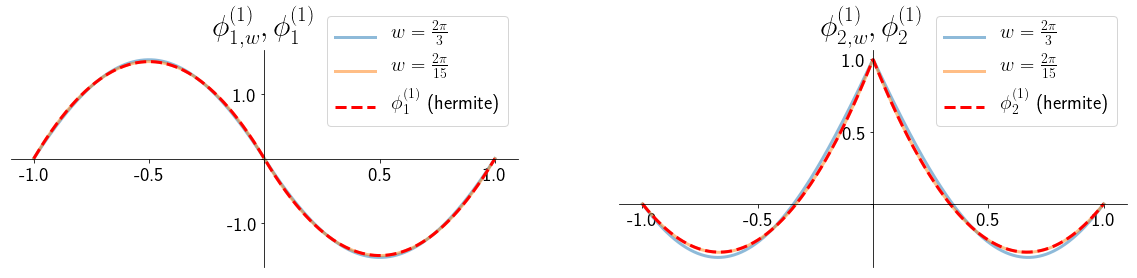

In [57]:
M = [3, 15]
X = np.linspace(-1, 1, 1000)
r = 1

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 4))
for m, color in zip(M, colors):
    f1 = lambda x: phi_1(2*np.pi/m, x)
    f2 = lambda x: phi_2(2*np.pi/m, x)
    ax[0].plot(X, [d_operator(f1, x, r) for x in X], lw=3, color=color, label=r'$w=\frac{2\pi}{%d}$' % m, alpha=0.5)
    ax[1].plot(X, [d_operator(f2, x, r) for x in X], lw=3, color=color, label=r'$w=\frac{2\pi}{%d}$' % m, alpha=0.5)
    

ax[0].plot(X, [d_operator(hphi_1, x, r) for x in X], lw=3, ls='--', color='red', label=r'$\phi_1^{(%d)}$ (hermite)' % r)
ax[1].plot(X, [d_operator(hphi_2, x, r) for x in X], lw=3, ls='--', color='red', label=r'$\phi_2^{(%d)}$ (hermite)' % r)
    
ax[0].xaxis.set_major_formatter(ticker.FuncFormatter(func))
ax[0].yaxis.set_major_formatter(ticker.FuncFormatter(func))
ax[0].spines['left'].set_position('center')
ax[0].spines['bottom'].set_position('zero')
ax[0].spines['right'].set_color('none')
ax[0].spines['top'].set_color('none')
ax[0].xaxis.set_ticks_position('bottom')
ax[0].yaxis.set_ticks_position('left')    
ax[0].tick_params(axis='both', labelsize=20)
ax[0].legend(loc='upper right', bbox_to_anchor=(1.,1.2), fontsize=20)
ax[0].set_title(r'$\phi_{1,w}^{(%d)}, \phi_1^{(%d)}$' % (r,r), fontsize=30)

ax[1].xaxis.set_major_formatter(ticker.FuncFormatter(func))
ax[1].yaxis.set_major_formatter(ticker.FuncFormatter(func))
ax[1].spines['left'].set_position('center')
ax[1].spines['bottom'].set_position('zero')
ax[1].spines['right'].set_color('none')
ax[1].spines['top'].set_color('none')
ax[1].xaxis.set_ticks_position('bottom')
ax[1].yaxis.set_ticks_position('left')  
ax[1].tick_params(axis='both', labelsize=20)
ax[1].legend(loc='upper right', bbox_to_anchor=(1, 1.2), fontsize=20)
ax[1].set_title(r'$\phi_{2,w}^{(%d)},\phi_2^{(%d)}$' % (r,r), fontsize=30)

plt.subplots_adjust(hspace=0.3)
plt.show(fig)

## Estimated second derivative comparison

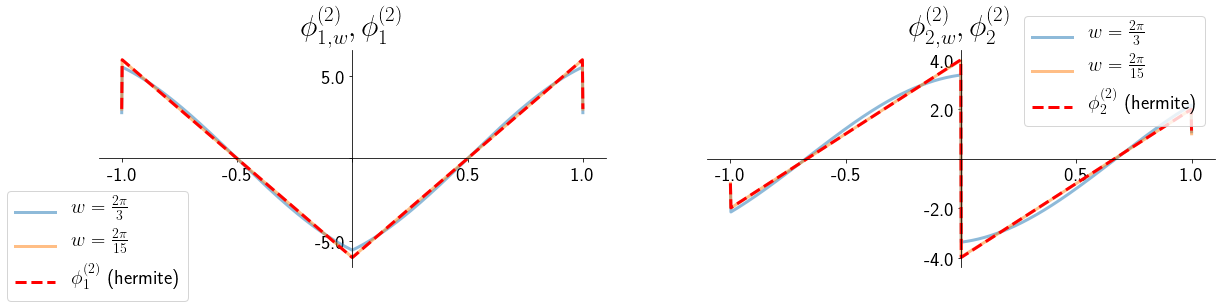

In [58]:
M = [3, 15]
X = np.linspace(-1, 1, 1000)
r = 2

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 4))
for m, color in zip(M, colors):
    f1 = lambda x: phi_1(2*np.pi/m, x)
    f2 = lambda x: phi_2(2*np.pi/m, x)
    ax[0].plot(X, [d_operator(f1, x, r) for x in X], lw=3, color=color, label=r'$w=\frac{2\pi}{%d}$' % m, alpha=0.5)
    ax[1].plot(X, [d_operator(f2, x, r) for x in X], lw=3, color=color, label=r'$w=\frac{2\pi}{%d}$' % m, alpha=0.5)
    

ax[0].plot(X, [d_operator(hphi_1, x, r) for x in X], lw=3, ls='--', color='red', label=r'$\phi_1^{(%d)}$ (hermite)' % r)
ax[1].plot(X, [d_operator(hphi_2, x, r) for x in X], lw=3, ls='--', color='red', label=r'$\phi_2^{(%d)}$ (hermite)' % r)
    
    
ax[0].xaxis.set_major_formatter(ticker.FuncFormatter(func))
ax[0].yaxis.set_major_formatter(ticker.FuncFormatter(func))
ax[0].spines['left'].set_position('center')
ax[0].spines['bottom'].set_position('zero')
ax[0].spines['right'].set_color('none')
ax[0].spines['top'].set_color('none')
ax[0].xaxis.set_ticks_position('bottom')
ax[0].yaxis.set_ticks_position('left')    
ax[0].tick_params(axis='both', labelsize=20)
ax[0].legend(loc='lower left', bbox_to_anchor=(-.2, -.2), fontsize=20)

ax[0].set_title(r'$\phi_{1,w}^{(%d)}, \phi_1^{(%d)}$' % (r,r), fontsize=30)

ax[1].xaxis.set_major_formatter(ticker.FuncFormatter(func))
ax[1].yaxis.set_major_formatter(ticker.FuncFormatter(func))
ax[1].spines['left'].set_position('center')
ax[1].spines['bottom'].set_position('zero')
ax[1].spines['right'].set_color('none')
ax[1].spines['top'].set_color('none')
ax[1].xaxis.set_ticks_position('bottom')
ax[1].yaxis.set_ticks_position('left')  
ax[1].tick_params(axis='both', labelsize=20)
ax[1].legend(loc='upper right', bbox_to_anchor=(1, 1.2), fontsize=20)

ax[1].set_title(r'$\phi_{2,w}^{(%d)},\phi_2^{(%d)}$' % (r,r), fontsize=30)

plt.subplots_adjust(hspace=0.3)
plt.show(fig)

### Gram matrix

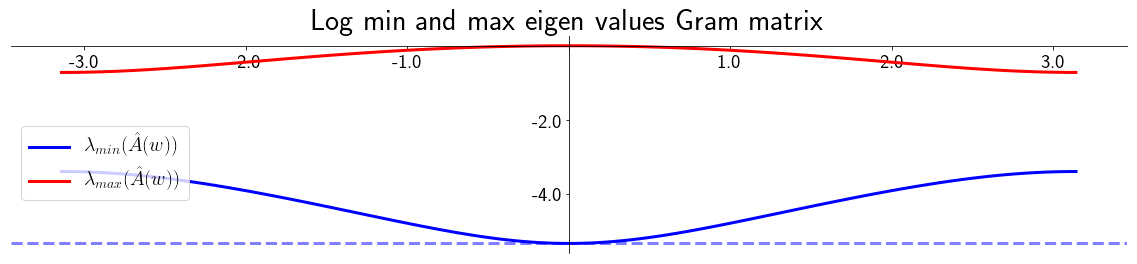

In [59]:
def A_H1(w):
    a = 26/35 + 9*np.exp(-w*1j)/70 + 9*np.exp(w*1j)/70
    b = -13*np.exp(-w*1j)/420 + 13*np.exp(w*1j)/420
    c = 13*np.exp(-w*1j)/420 - 13*np.exp(w*1j)/420
    d = 2/105 -  np.exp(-w*1j)/140 - np.exp(w*1j)/140
    return np.array([[a, b], [c,d]])

W = np.linspace(-np.pi, np.pi, 100)
Lmin = []
Lmax = []

for w in W:
    A = A_H1(w)
    eigval = np.linalg.eigh(A)[0]
    Lmin.append(min(eigval))
    Lmax.append(max(eigval))
    
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 4))
ax.plot(W, np.log(Lmin), lw=3, ls='-', color='blue', label=r'$\lambda_{min}(\hat{A}(w))$')
ax.plot(W, np.log(Lmax), lw=3, ls='-', color='red', label=r'$\lambda_{max}(\hat{A}(w))$')
ax.axhline(y=np.log(1/210), lw=3, ls='--', color='blue', alpha=0.5)
    
ax.xaxis.set_major_formatter(ticker.FuncFormatter(func))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(func))
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')    
ax.tick_params(axis='both', labelsize=20)
ax.legend(loc='lower left', bbox_to_anchor=(0, .2), fontsize=20)

ax.set_title("Log min and max eigen values Gram matrix", fontsize=30)
plt.show(fig)    

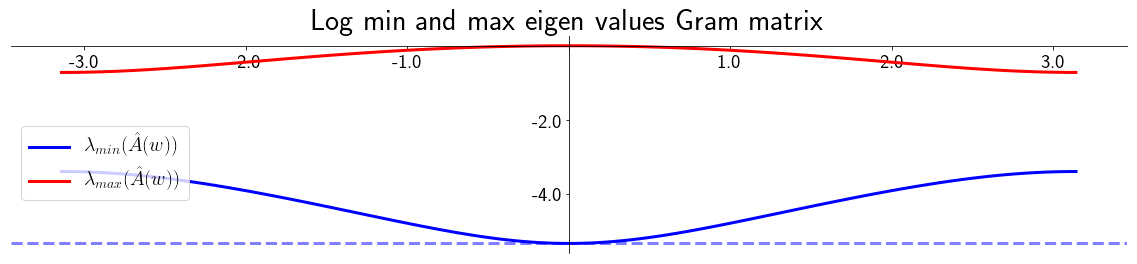

In [60]:
def A_H1(w):
    a = 26/35 + 9*np.exp(-w*1j)/70 + 9*np.exp(w*1j)/70
    b = -13*np.exp(-w*1j)/420 + 13*np.exp(w*1j)/420
    c = 13*np.exp(-w*1j)/420 - 13*np.exp(w*1j)/420
    d = 2/105 -  np.exp(-w*1j)/140 - np.exp(w*1j)/140
    return np.array([[a, 0, b, 0], [0, a, 0, b], [c, 0, d, 0], [0, c, 0, d]])

W = np.linspace(-np.pi, np.pi, 100)
Lmin = []
Lmax = []

for w in W:
    A = A_H1(w)
    eigval = np.linalg.eigh(A)[0]
    Lmin.append(min(eigval))
    Lmax.append(max(eigval))
    
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 4))
ax.plot(W, np.log(Lmin), lw=3, ls='-', color='blue', label=r'$\lambda_{min}(\hat{A}(w))$')
ax.plot(W, np.log(Lmax), lw=3, ls='-', color='red', label=r'$\lambda_{max}(\hat{A}(w))$')
ax.axhline(y=np.log(1/210), lw=3, ls='--', color='blue', alpha=0.5)
    
ax.xaxis.set_major_formatter(ticker.FuncFormatter(func))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(func))
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')    
ax.tick_params(axis='both', labelsize=20)
ax.legend(loc='lower left', bbox_to_anchor=(0, .2), fontsize=20)

ax.set_title("Log min and max eigen values Gram matrix", fontsize=30)
plt.show(fig)    

# IV. Hermite Polynomial order 2

In notations used by Schoenberg, we consider the case $r=3$ and $m=3$. For such settings basis generators for interpolation the function and its derivatives of order 1 and 2 are

\begin{align}
  L_0(x) &= 1 + a_{1,0} x^3 + a_{2,0} x^4 + a_{3,0} x^5 \\
  L_1(x) &= x + a_{1,1} x^3 + a_{2,1} x^4 + a_{3,1} x^5 \\
  L_2(x) &= \frac{1}{2}x^2 + a_{1,2} x^3 + a_{2,2} x^4 + a_{3,2} x^5 \\
\end{align}

The values of the coefficients are simply obtained by solving linear systems of 3 equations as follows.

### $L_0$

In [61]:
# We solve the sysem SA = B
S = np.array([[1,1,1],
              [3,4,5],
              [3,6,10]], dtype=float)
B = np.array([[-1], [0], [0]], dtype=float)
A0 = np.linalg.inv(S).dot(B)

def L_0(x):
    assert 0 <= x
    if 1 < x:
        return 0
    else:
        return 1 + A0[0]*x**3 + A0[1]*x**4 + A0[2]*x**5
    
def h2phi_1(x):
    if 1 <= np.abs(x):
        return 0
    else:
        return L_0(np.abs(x))

In [99]:
def h2phi_1(x):
    if 1 <= np.abs(x):
        return 0
    else:
        return L_0(np.abs(x))

\begin{equation}
  L_0(x) = 1 - 10 x^3 + 15 x^4 - 6 x^5 
\end{equation}

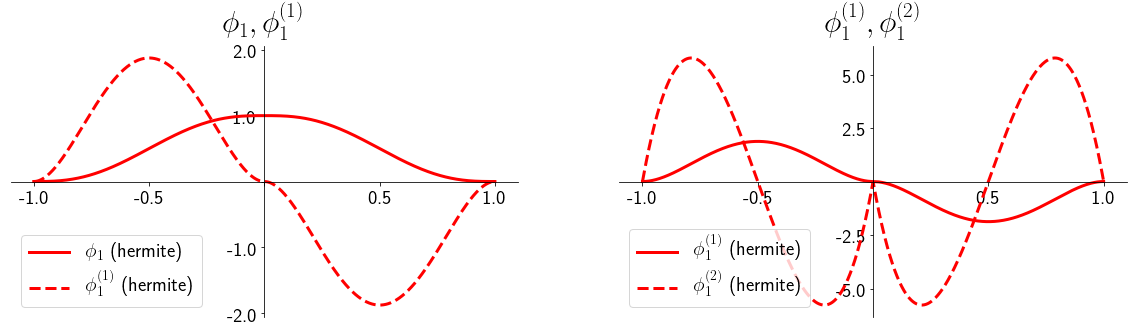

In [62]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
X = np.linspace(-1, 1, 1000)

r = 1
ax[0].plot(X, [d_operator(h2phi_1, x, 0) for x in X], lw=3, ls='-', color='red', label=r'$\phi_1$ (hermite)')
ax[0].plot(X, [d_operator(h2phi_1, x, r) for x in X], lw=3, ls='--', color='red', label=r'$\phi_1^{(%d)}$ (hermite)' % r)
   
ax[0].xaxis.set_major_formatter(ticker.FuncFormatter(func))
ax[0].yaxis.set_major_formatter(ticker.FuncFormatter(func))
ax[0].spines['left'].set_position('center')
ax[0].spines['bottom'].set_position('zero')
ax[0].spines['right'].set_color('none')
ax[0].spines['top'].set_color('none')
ax[0].xaxis.set_ticks_position('bottom')
ax[0].yaxis.set_ticks_position('left')    
ax[0].tick_params(axis='both', labelsize=20)
ax[0].legend(loc='best', fontsize=20)

ax[0].set_title(r'$\phi_{1}, \phi_1^{(%d)}$' % (r), fontsize=30)

r = 2
ax[1].plot(X, [d_operator(h2phi_1, x, r-1) for x in X], lw=3, ls='-', color='red', label=r'$\phi_1^{(%d)}$ (hermite)' % (r-1))
ax[1].plot(X, [d_operator(h2phi_1, x, r) for x in X], lw=3, ls='--', color='red', label=r'$\phi_1^{(%d)}$ (hermite)' % r)
    
ax[1].xaxis.set_major_formatter(ticker.FuncFormatter(func))
ax[1].yaxis.set_major_formatter(ticker.FuncFormatter(func))
ax[1].spines['left'].set_position('center')
ax[1].spines['bottom'].set_position('zero')
ax[1].spines['right'].set_color('none')
ax[1].spines['top'].set_color('none')
ax[1].xaxis.set_ticks_position('bottom')
ax[1].yaxis.set_ticks_position('left')    
ax[1].tick_params(axis='both', labelsize=20)
ax[1].legend(loc='lower left', fontsize=20)

ax[1].set_title(r'$\phi_1^{(%d)}, \phi_1^{(%d)}$' % (r-1, r), fontsize=30)

plt.show(fig)

### $L_1$

In [63]:
# We solve the sysem SA = B
S = np.array([[1,1,1],
              [3,4,5],
              [3,6,10]], dtype=float)
B = np.array([[-1], [-1], [0]], dtype=float)
A1 = np.linalg.inv(S).dot(B)

def L_1(x):
    assert 0 <= x
    if 1 < x:
        return 0
    else:
        return x + A1[0]*x**3 + A1[1]*x**4 + A1[2]*x**5
    
def h2phi_2(x):
    if 1 <= np.abs(x):
        return 0
    else:
        if 0 <= x:
            return L_1(x)
        else:
            return -L_1(-x)

\begin{equation}
  L_1(x) = x - 6 x^3 + 8 x^4 - 3 x^5 
\end{equation}

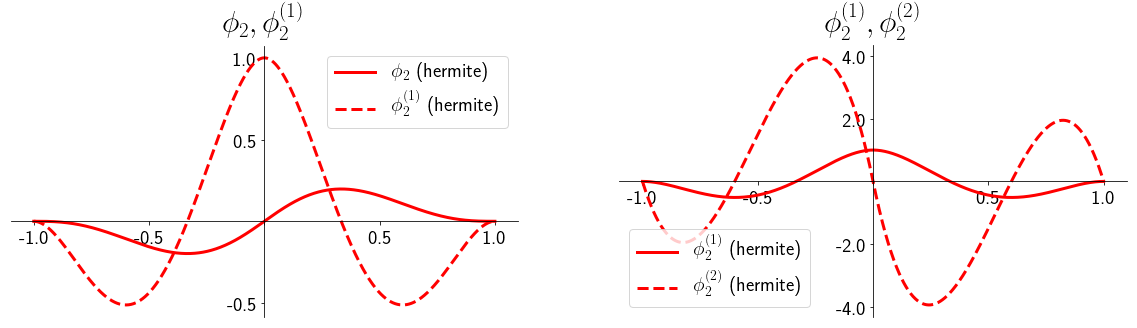

In [64]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
X = np.linspace(-1, 1, 1000)

r = 1
ax[0].plot(X, [d_operator(h2phi_2, x, 0) for x in X], lw=3, ls='-', color='red', label=r'$\phi_2$ (hermite)')
ax[0].plot(X, [d_operator(h2phi_2, x, r) for x in X], lw=3, ls='--', color='red', label=r'$\phi_2^{(%d)}$ (hermite)' % r)
   
ax[0].xaxis.set_major_formatter(ticker.FuncFormatter(func))
ax[0].yaxis.set_major_formatter(ticker.FuncFormatter(func))
ax[0].spines['left'].set_position('center')
ax[0].spines['bottom'].set_position('zero')
ax[0].spines['right'].set_color('none')
ax[0].spines['top'].set_color('none')
ax[0].xaxis.set_ticks_position('bottom')
ax[0].yaxis.set_ticks_position('left')    
ax[0].tick_params(axis='both', labelsize=20)
ax[0].legend(loc='best', fontsize=20)

ax[0].set_title(r'$\phi_{2}, \phi_2^{(%d)}$' % (r), fontsize=30)

r = 2
ax[1].plot(X, [d_operator(h2phi_2, x, r-1) for x in X], lw=3, ls='-', color='red', label=r'$\phi_2^{(%d)}$ (hermite)' % (r-1))
ax[1].plot(X, [d_operator(h2phi_2, x, r) for x in X], lw=3, ls='--', color='red', label=r'$\phi_2^{(%d)}$ (hermite)' % r)
    
ax[1].xaxis.set_major_formatter(ticker.FuncFormatter(func))
ax[1].yaxis.set_major_formatter(ticker.FuncFormatter(func))
ax[1].spines['left'].set_position('center')
ax[1].spines['bottom'].set_position('zero')
ax[1].spines['right'].set_color('none')
ax[1].spines['top'].set_color('none')
ax[1].xaxis.set_ticks_position('bottom')
ax[1].yaxis.set_ticks_position('left')    
ax[1].tick_params(axis='both', labelsize=20)
ax[1].legend(loc='lower left', fontsize=20)

ax[1].set_title(r'$\phi_2^{(%d)}, \phi_2^{(%d)}$' % (r-1, r), fontsize=30)

plt.show(fig)

### $L_2$

In [65]:
# We solve the sysem SA = B
S = np.array([[1,1,1],
              [3,4,5],
              [3,6,10]], dtype=float)
B = np.array([[-0.5], [-1], [-0.5]], dtype=float)
A2 = np.linalg.inv(S).dot(B)

def L_2(x):
    assert 0 <= x
    if 1 < x:
        return 0
    else:
        return x**2/2 + A2[0]*x**3 + A2[1]*x**4 + A2[2]*x**5
    
def h2phi_3(x):
    if 1 <= np.abs(x):
        return 0
    else:
        if 0 <= x:
            return L_2(x)
        else:
            return L_2(-x)

\begin{equation}
  L_2(x) = \frac{x^2}{2} - 1.5 x^3 + 1.5 x^4 - \frac{1}{2} x^5 
\end{equation}

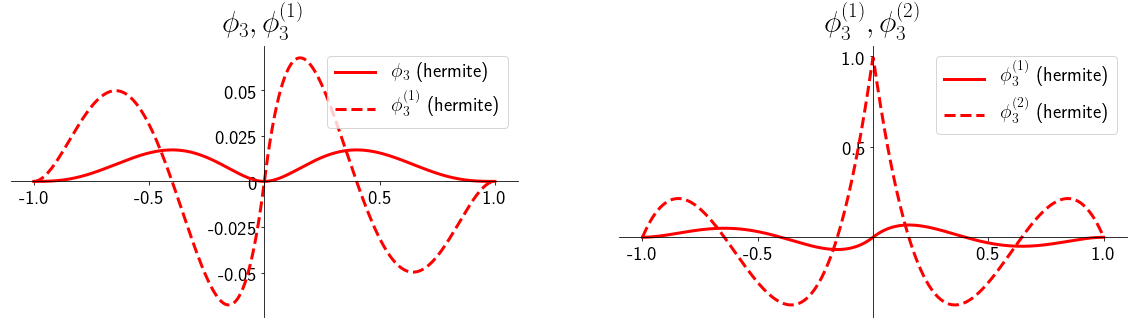

In [66]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
X = np.linspace(-1, 1, 1000)

r = 1
ax[0].plot(X, [d_operator(h2phi_3, x, 0) for x in X], lw=3, ls='-', color='red', label=r'$\phi_3$ (hermite)')
ax[0].plot(X, [d_operator(h2phi_3, x, r) for x in X], lw=3, ls='--', color='red', label=r'$\phi_3^{(%d)}$ (hermite)' % r)
   
ax[0].xaxis.set_major_formatter(ticker.FuncFormatter(func))
ax[0].yaxis.set_major_formatter(ticker.FuncFormatter(func))
ax[0].spines['left'].set_position('center')
ax[0].spines['bottom'].set_position('zero')
ax[0].spines['right'].set_color('none')
ax[0].spines['top'].set_color('none')
ax[0].xaxis.set_ticks_position('bottom')
ax[0].yaxis.set_ticks_position('left')    
ax[0].tick_params(axis='both', labelsize=20)
ax[0].legend(loc='best', fontsize=20)
ax[0].yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2g'))
ax[0].set_title(r'$\phi_{3}, \phi_3^{(%d)}$' % (r), fontsize=30)

r = 2
ax[1].plot(X, [d_operator(h2phi_3, x, r-1) for x in X], lw=3, ls='-', color='red', label=r'$\phi_3^{(%d)}$ (hermite)' % (r-1))
ax[1].plot(X, [d_operator(h2phi_3, x, r) for x in X], lw=3, ls='--', color='red', label=r'$\phi_3^{(%d)}$ (hermite)' % r)
    
ax[1].xaxis.set_major_formatter(ticker.FuncFormatter(func))
ax[1].yaxis.set_major_formatter(ticker.FuncFormatter(func))
ax[1].spines['left'].set_position('center')
ax[1].spines['bottom'].set_position('zero')
ax[1].spines['right'].set_color('none')
ax[1].spines['top'].set_color('none')
ax[1].xaxis.set_ticks_position('bottom')
ax[1].yaxis.set_ticks_position('left')    
ax[1].tick_params(axis='both', labelsize=20)
ax[1].legend(loc='upper right', fontsize=20)

ax[1].set_title(r'$\phi_3^{(%d)}, \phi_3^{(%d)}$' % (r-1, r), fontsize=30)

plt.show(fig)

## Comparing all three generators

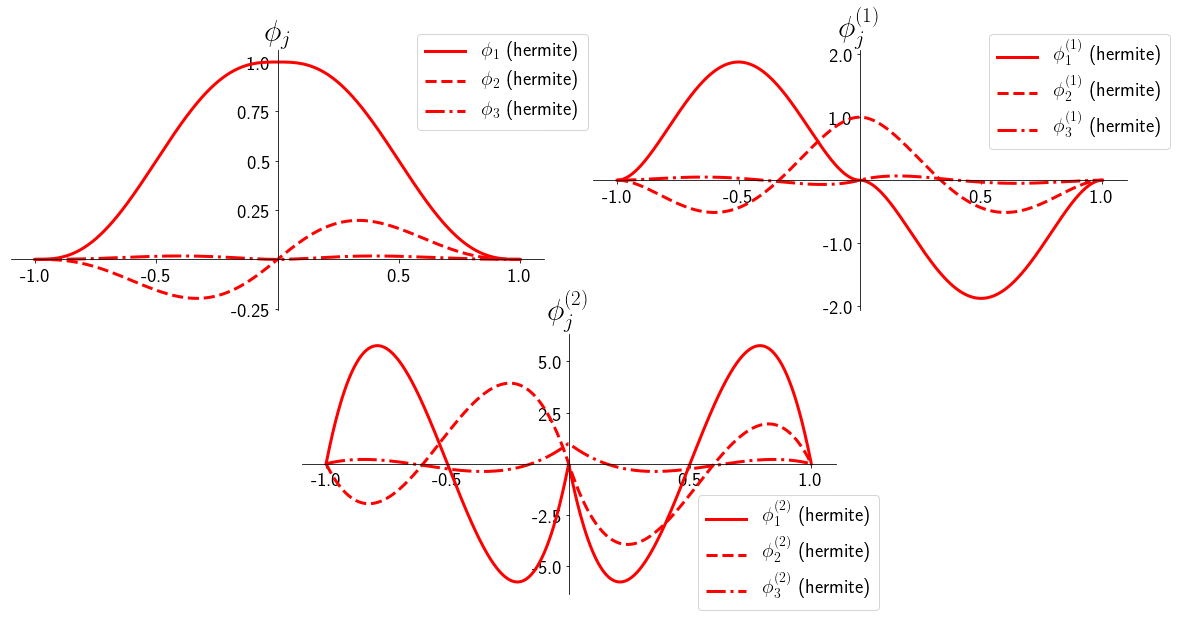

In [68]:
fig = plt.figure(figsize=(20, 10))
gs = gridspec.GridSpec(4, 4, wspace=0.2, hspace=0.2)
X = np.linspace(-1, 1, 1000)

ax = plt.subplot(gs[:2, :2])
ax.plot(X, [d_operator(h2phi_1, x, 0) for x in X], lw=3, ls='-', color='red', label=r'$\phi_1$ (hermite)')
ax.plot(X, [d_operator(h2phi_2, x, 0) for x in X], lw=3, ls='--', color='red', label=r'$\phi_2$ (hermite)')
ax.plot(X, [d_operator(h2phi_3, x, 0) for x in X], lw=3, ls='-.', color='red', label=r'$\phi_3$ (hermite)')
   
ax.xaxis.set_major_formatter(ticker.FuncFormatter(func))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(func))
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')    
ax.tick_params(axis='both', labelsize=20)
ax.legend(loc='upper right', fontsize=20, bbox_to_anchor=(1.1, 1.1))
ax.set_title(r'$\phi_{j}$', fontsize=30)

r = 1
ax = plt.subplot(gs[:2, 2:])
ax.plot(X, [d_operator(h2phi_1, x, r) for x in X], lw=3, ls='-', color='red', label=r'$\phi_1^{(%d)}$ (hermite)' % r)
ax.plot(X, [d_operator(h2phi_2, x, r) for x in X], lw=3, ls='--', color='red', label=r'$\phi_2^{(%d)}$ (hermite)' % r)
ax.plot(X, [d_operator(h2phi_3, x, r) for x in X], lw=3, ls='-.', color='red', label=r'$\phi_3^{(%d)}$ (hermite)' % r )
    
ax.xaxis.set_major_formatter(ticker.FuncFormatter(func))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(func))
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')    
ax.tick_params(axis='both', labelsize=20)
ax.legend(loc='upper right', fontsize=20, bbox_to_anchor=(1.1, 1.1))
ax.set_title(r'$\phi_j^{(%d)}$' % r, fontsize=30)

r = 2
ax = plt.subplot(gs[2:4, 1:3])
ax.plot(X, [d_operator(h2phi_1, x, r) for x in X], lw=3, ls='-', color='red', label=r'$\phi_1^{(%d)}$ (hermite)' % r)
ax.plot(X, [d_operator(h2phi_2, x, r) for x in X], lw=3, ls='--', color='red', label=r'$\phi_2^{(%d)}$ (hermite)' % r)
ax.plot(X, [d_operator(h2phi_3, x, r) for x in X], lw=3, ls='-.', color='red', label=r'$\phi_3^{(%d)}$ (hermite)' % r )
    
ax.xaxis.set_major_formatter(ticker.FuncFormatter(func))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(func))
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')    
ax.tick_params(axis='both', labelsize=20)
ax.legend(loc='lower right', fontsize=20, bbox_to_anchor=(1.1, -.1))
ax.set_title(r'$\phi_j^{(%d)}$' % r, fontsize=30)


fig.savefig("../notes/hermite/basis.png")
plt.show(fig)

# V. Eigensplines

In [338]:
# Dict of eigenspline functions parameters
# Key is (m,r,i) with i=0, ..., 2m-2r-1
deig = dict()

The eigenspline $S$ is such that  $P = S_{|[0,1]}$ takes the form

\begin{equation}
P = a_0 x^{2m-1} + \binom{2m-1}{1} a_1 x^{2m-2} + \ldots + \binom{2m-1}{2m-1-r}a_{2m-1-r}x^r
\end{equation}

and satisfies

\begin{align}
P^{(s)}(0) &= P^{(s)}(1) = 0 \quad \text{for} \quad s=0, \ldots, r-1 \\
P^{(s)}(1) &= \lambda P^{(s)}(0) \quad \text{for} \quad s=r, \ldots, 2m-r-1
\end{align}

### Case $r=1$

In [351]:
r = 1

If $m=1$, $\dim \mathring{\mathcal{S}}_{2m,r} = 0$ and the only eigenspline is the trivial function.

If $m=2$, $P = S_{|[0,1]}$ takes the form 
\begin{equation*}
    P = a_0 x^3 + 3 a_1 x^2 + 3a_2 x
\end{equation*}
with homogeneous system
\begin{equation}
\begin{array}{lcl}
 a_0 + 3a_1 + 3a_2 & = & 0 \\
 3a_0 + 6a_1 + 3(1-\lambda)a_2 & = & 0 \\
 6a_0 + 6a_1(1-\lambda) & = & 0
\end{array}
\end{equation}

$\lambda$ is chosen so that the matrix of the system in singular in order for the eigenspline not to be trivial. Coeffients are then determined up to constant which is fixed by the following constraint $S^{(1)}(0) = 1$. This adds the equation

\begin{equation}
 3a_2 = 1
\end{equation}

The matrix of the system is singular iif $\lambda$ is a zero of 
\begin{equation}
 \Pi_{2m-1, r}(\lambda) = 1+4\lambda+\lambda^2
\end{equation}

that is $\lambda_1 = -2 + \sqrt{3}, \lambda_2 = -2 - \sqrt{3}$.

Coefficients S_1 [ 0.73205081 -0.57735027  0.33333333]
Coefficients S_2 [-2.73205081  0.57735027  0.33333333]


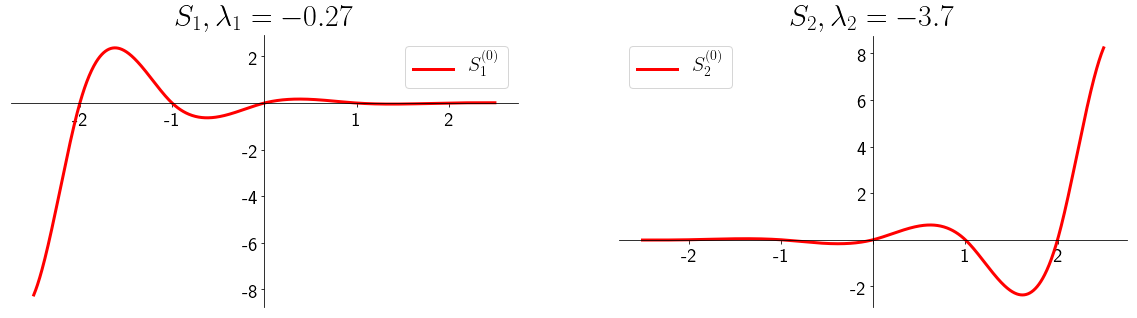

In [353]:
### Solve the new system with 1 equation replaced by normalisation constraint
# The system MA = B
m = 2
lbdas = [-2 + np.sqrt(3), -2-np.sqrt(3)]
nrows = np.int(np.ceil(len(lbdas)/2))

fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(20, 5*nrows))
ax = ax.flatten()
X = np.linspace(-2.5, 2.5, 1000)
for i, lbda in enumerate(lbdas):
    M = np.array([[1,3,3], [1, 2, 1-lbda], [0,0,3]])
    B = np.array([0,0,1])
    A = np.linalg.inv(M).dot(B)
    print("Coefficients S_%d %s" % (i+1, A))
    
    def eigspl(x):
        if 0 <= x and x < 1:
            return A[0]*x**3 + 3*A[1]*x**2 + 3*A[2]*x
        else:
            p = np.int(np.floor(x))
            return lbda**p*(A[0]*(x-p)**3 + 3*A[1]*(x-p)**2 + 3*A[2]*(x-p))
                            
    for rho in range(1):
        Y =  [d_operator(eigspl, x, rho) for x in X]
        ax[i].plot(X, Y, lw=3, ls=lines[rho], color='red', label=r"$S_{%d}^{(%d)}$" % (i+1, rho))
                 
    format_ax(ax[i], title=r'$S_%d, \lambda_{%d} = %.2g$' % (i+1, i+1, lbda), loc='best')
    
    # Record lbda, coeffs
    deig[(m,r,i+1)] = (lbda, A)
    
fig.savefig("../report/images/eigsplines_r%d_m%d.png" % (r, m))
plt.show(fig)

If $m=3$, $P = S_{|[0,1]}$ takes the form 
\begin{equation*}
    P = a_0 x^5 + 5 a_1 x^4 + 10a_2 x^3 + 10a_3 x^2 + 5a_4 x
\end{equation*}
with homogeneous system
\begin{equation}
\begin{array}{lcl}
 a_0 + 5a_1 + 10a_2 + 10a_3 + 5a_4 & = & 0 \\
 5a_0 + 20a_1 + 30a_2 + 20a_3 + 5(1-\lambda)a_4 & = & 0 \\
 20a_0 + 60a_1 + 60a_2 + 20(1-\lambda)a_3 & = & 0 \\
 60a_0 + 120a_1 + 60(1-\lambda)a_2 & = & 0 \\
 120a_0 + 120a_1(1-\lambda) & = & 0
\end{array}
\end{equation}

$\lambda$ is chosen so that the matrix of the system in singular in order for the eigenspline not to be trivial. Coeffients are then determined up to constant which is fixed by the following constraint $S^{(1)}(0) = 1$. This adds the equation

\begin{equation}
 5a_4 = 1
\end{equation}

The matrix of the system
\begin{equation}
\begin{bmatrix}
1 & 1-\lambda & 0 & 0 & 0 \\
1 & 2 & 1-\lambda & 0 & 0 \\
1 & 3 & 3 & 1-\lambda & 0 \\
1 & 4 & 6 & 4 & 1-\lambda \\  
1 & 5 & 10 & 10 & 5\\  
\end{bmatrix}
\end{equation}

is singular iif $\lambda$ is a zero of 
\begin{equation}
 \Pi_{2m-1, r}(\lambda) = 1 + 26\lambda + 66\lambda^2 + 26\lambda^3 + \lambda^4
\end{equation}

Coefficients S_1 [ 0.43341463 -0.41550779  0.38117377 -0.31676134  0.2       ]
Coefficients S_2 [-0.47144627  0.32955012 -0.13117377 -0.08645666  0.2       ]
Coefficients S_3 [ 1.09492165 -0.32955012 -0.13117377  0.08645666  0.2       ]
Coefficients S_4 [-10.05689001   0.41550779   0.38117377   0.31676134   0.2       ]


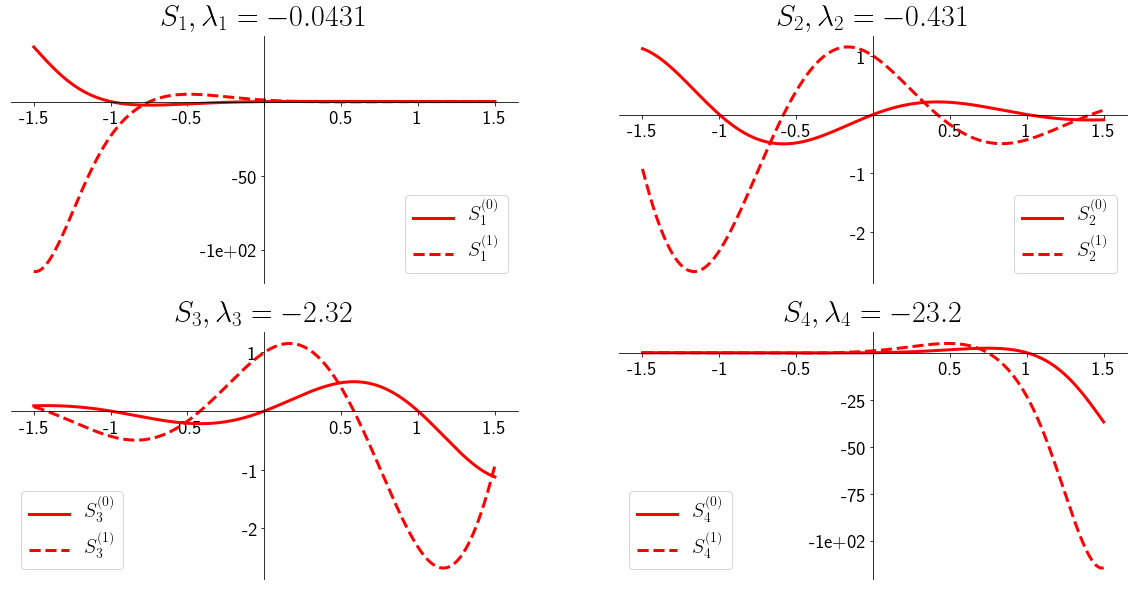

In [341]:
### Solve the new system with 1 equation replaced by normalisation constraint
# The system MA = B
m = 3
lbdas = [0.5*(-13 - np.sqrt(105) + np.sqrt(2*(135 + 13*np.sqrt(105)))),
        0.5*(-13 + np.sqrt(105) + np.sqrt(2*(135 - 13*np.sqrt(105)))),
        0.5*(-13 + np.sqrt(105) - np.sqrt(2*(135 - 13*np.sqrt(105)))),
        0.5*(-13 - np.sqrt(105) - np.sqrt(2*(135 + 13*np.sqrt(105))))]

nrows = np.int(np.ceil(len(lbdas)/2))

fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(20, 5*nrows))
ax = ax.flatten()
X = np.linspace(-1.5, 1.5, 1000)
for i, lbda in enumerate(lbdas):
    M = np.array([[1,5,10,10,5], [1,4,6,4,1-lbda], [1,3,3,1-lbda,0], [1,2,1-lbda,0,0], [0,0,0,0,5]])
    B = np.array([0,0,0,0,1])
    A = np.linalg.inv(M).dot(B)
    print("Coefficients S_%d %s" % (i+1, A))
    
    def eigspl(x):
        if 0 <= x and x < 1:
            return A[0]*x**5 + 5*A[1]*x**4 + 10*A[2]*x**3 + 10*A[3]*x**2+5*A[4]*x
        else:
            p = np.int(np.floor(x))
            return lbda**p*(A[0]*(x-p)**5 + 5*A[1]*(x-p)**4 + 10*A[2]*(x-p)**3 + 10*A[3]*(x-p)**2+5*A[4]*(x-p))
                            
    for rho in range(2):
        Y =  [d_operator(eigspl, x, rho) for x in X]
        ax[i].plot(X, Y, lw=3, ls=lines[rho], color='red', label=r"$S_{%d}^{(%d)}$" % (i+1, rho))
                 
    format_ax(ax[i], title=r'$S_%d, \lambda_{%d} = %.3g$' % (i+1, i+1, lbda), loc='best')
    
    # Record lbda, coeffs
    deig[(m,r,i+1)] = (lbda, A)

fig.savefig("../report/images/eigsplines_r%d_m%d.png" % (r, m))
plt.show(fig)

### Case $r=2$

In [342]:
r=2

If $m=2$, $\dim \mathring{\mathcal{S}}_{2m,r} = 0$ and the only eigenspline is the trivial function.

If $m=3$, $P = S_{|[0,1]}$ takes the form 
\begin{equation*}
    P = a_0 x^5 + 5 a_1 x^4 + 10a_2 x^3 + 10a_3 x^2
\end{equation*}
with homogeneous system
\begin{equation}
\begin{array}{lcl}
 a_0 + 5a_1 + 10a_2 + 10a_3 & = & 0 \\
 5a_0 + 20a_1 + 30a_2 + 20a_3 & = & 0 \\
 20a_0 + 60a_1 + 60a_2 + 20a_3(1-\lambda) & = & 0 \\
 60a_0 + 120a_1 + 60a_2(1-\lambda) & = & 0
\end{array}
\end{equation}

$\lambda$ is chosen so that the matrix of the system in singular in order for the eigenspline not to be trivial. Coeffients are then determined up to constant which is fixed by the following constraint $S^{(2)}(0) = 1$. This adds the equation

\begin{equation}
 20a_3 = 1
\end{equation}

The matrix of the system 

\begin{equation}
\begin{bmatrix}
1 & 2 & 1-\lambda & 0 \\
1 & 3 & 3 & 1-\lambda \\
1 & 4 & 6 & 4 \\
1 & 5 & 10 & 10\\  
\end{bmatrix}
\end{equation}

is singular iif $\lambda$ is a zero of 
\begin{equation}
 \Pi_{2m-1, r}(\lambda) = 1-6\lambda+\lambda^2
\end{equation}

that is $\lambda_1 = 3-2\sqrt{2}, \lambda_2 = 3+2\sqrt{2}$.

Coefficients S_1 [-0.41421356  0.26568542 -0.14142136  0.05      ]
Coefficients S_2 [ 2.41421356 -0.86568542  0.14142136  0.05      ]


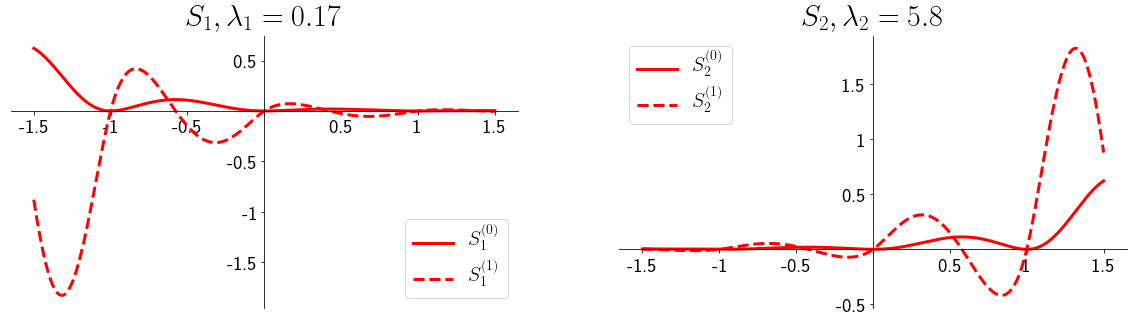

In [343]:
### Solve the new system with 1 equation replaced by normalisation constraint
# The system MA = B
m = 3
lbdas = [3 -  2*np.sqrt(2), 3+2*np.sqrt(2)]
nrows = np.int(np.ceil(len(lbdas)/2))

fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(20, 5*nrows))
ax = ax.flatten()
X = np.linspace(-1.5, 1.5, 1000)
for i, lbda in enumerate(lbdas):
    M = np.array([[1,2,1-lbda,0], [1, 3, 3, 1-lbda], [1,4,6,4], [0,0,0,20]])
    B = np.array([0,0,0,1])
    A = np.linalg.inv(M).dot(B)
    print("Coefficients S_%d %s" % (i+1, A))
    
    def eigspl(x):
        if 0 <= x and x < 1:
            return A[0]*x**5 + 5*A[1]*x**4 + 10*A[2]*x**3 + 10*A[3]*x**2
        else:
            p = np.int(np.floor(x))
            return lbda**p*(A[0]*(x-p)**5 + 5*A[1]*(x-p)**4 + 10*A[2]*(x-p)**3 + 10*A[3]*(x-p)**2)
                            
    for rho in range(2):
        Y =  [d_operator(eigspl, x, rho) for x in X]
        ax[i].plot(X, Y, lw=3, ls=lines[rho], color='red', label=r"$S_{%d}^{(%d)}$" % (i+1, rho))
                 
    format_ax(ax[i], title=r'$S_%d, \lambda_{%d} = %.2g$' % (i+1, i+1, lbda), loc='best')
    
    # Record lbda, coeffs
    deig[(m,r,i+1)] = (lbda, A)
    
fig.savefig("../report/images/eigsplines_r%d_m%d.png" % (r, m))
plt.show(fig)

# V Fundamental splines

The fundamental splines for $s=0, \ldots, r-1$ takes the form on $[0, \infty)$

\begin{equation}
L_s(x) = 
\begin{cases} 
  P_s(x)=
  \begin{cases}
   \frac{1}{s!}x^s + a_{1,s}x^r + a_{2,s}x^{r+2} + \cdots + a_{m-r+1,s}x^{2m-r}
      + a_{m-r+2,s} x^{2m-r+1} + \cdots + a_{m,s} x^{2m-1} & \text{if $r-s \equiv 0[2]$} \\
      \frac{1}{s!}x^s + a_{1,s}x^{r+1} + a_{2,s}x^{r+3} + \cdots + a_{m-r,s}x^{2m-r-1}
      + a_{m-r+1,s} x^{2m-r} + \cdots + a_{m,s} x^{2m-1} & \text{otherwise}
  \end{cases} & \text{if} \ 0 \leq x \leq 1 \\
  \sum_{j=1}^{m-r} c_{j,s} S_j(x) & \text{if} \ x \geq 1
\end{cases}
\end{equation}

and are even if $s$ even, odd if $s$ odd.

$L_s$ has to satisfy the system

\begin{equation}
  P_s^{(\rho)}(1) = \sum_{j=1}^{m-r} c_{j,s} S_j^{(\rho)}(1) \quad \text{for} \quad \rho = 0, \ldots, 2m-r-1
\end{equation}

### Case $r=1$

In [355]:
r = 1

If $m=1$, $L_0$ has compact support in $[-1,1]$ and the coefficient $a_{1,0}$ is to satisfy

\begin{equation}
 1 + a_{1,0} = 0
\end{equation}

that is $L_0$ is the hat function.

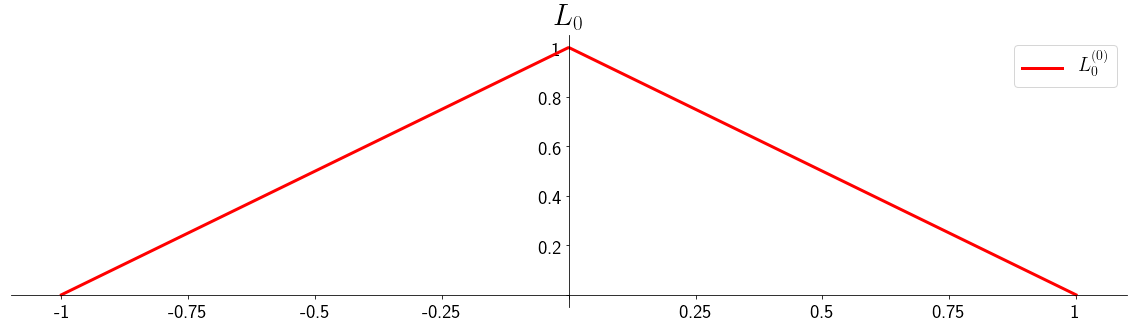

In [356]:
m = 1

def L_0(x):
    if np.abs(x) > 1:
        return 0
    else:
        if 0 <= x:
            return 1 - x
        else: 
            return 1 + x
        
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))
X = np.linspace(-1, 1, 1000)
Y =  [d_operator(L_0, x, 0) for x in X]
ax.plot(X, Y, lw=3, ls=lines[0], color='red', label=r"$L_{%d}^{(%d)}$" % (0, 0)) 
                 
format_ax(ax, title=r'$L_{%d}$' % (0), loc='upper right')
fig.savefig("../report/images/fundspline_r%d_m%d.png" % (r, m))
plt.show(fig)

If $m=2$, $L_0$ is even, infinitely suppported with
\begin{align*}
  L_0(x) = 
 \begin{cases}
    1 + a_{1,0} x^2 + a_{2,0}x^3 & \text{if} \ 0 \leq x \leq 1 \\
    c_{1,0} S_1(x) & \text{if} \  x \geq 1 \\
  \end{cases}
\end{align*}
and the coefficients satisfy
\begin{equation}
\begin{array}{rcl}
 a_{1,0} + a_{2,0} - c_{1,0} S_1(1) & = & -1  \\
 2a_{1,0} + 3a_{2,0} - c_{1,0} S_1^{(1)}(1) & = & 0 \\
 2a_{1,0} + 6a_{2,0} - c_{1,0} S_1^{(2)}(1) & = & 0
\end{array}
\end{equation}

Coefficients L_0 [-2.19607781  1.19607781  3.0002785 ]


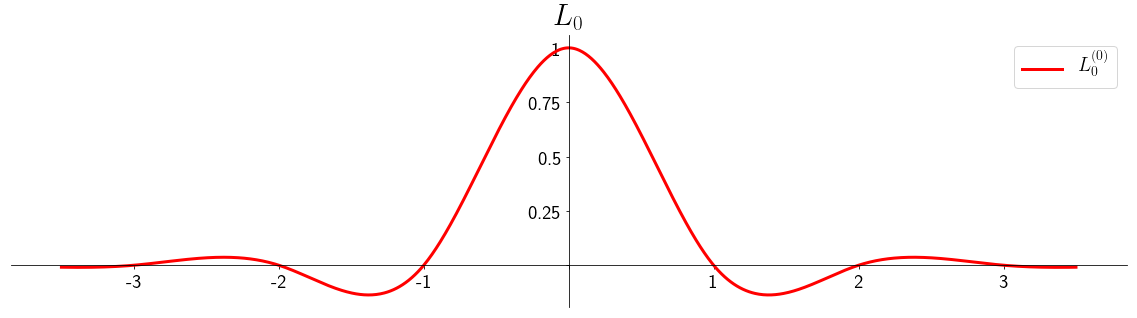

In [361]:
### Solve the system
# The system MA = B
m = 2

def S_1(x):
    lbda, A = deig[(m,r,1)]
    if 0 <= x and x < 1:
        return A[0]*x**3 + 3*A[1]*x**2 + 3*A[2]*x
    else:
        p = np.int(np.floor(x))
        return lbda**p*(A[0]*(x-p)**3 + 3*A[1]*(x-p)**2 + 3*A[2]*(x-p))

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))
X = np.linspace(-3.5, 3.5, 1000)

M = np.array([[1,1,-S_1(1)], [2,3,-d_operator(S_1, 1, 1)], [2,6,-d_operator(S_1, 1, 2)]])
B = np.array([-1,0, 0])
A = np.linalg.inv(M).dot(B)
print("Coefficients L_%d %s" % (0, A))

def funspl(x):
    if 0 <= x and x < 1:
        return 1 + A[0]*x**2 + A[1]*x**3
    elif x >= 1:
        return A[2]*S_1(x)
    else:
        return funspl(-x)

for rho in range(1):
    Y =  [d_operator(funspl, x, rho) for x in X]
    ax.plot(X, Y, lw=3, ls=lines[rho], color='red', label=r"$L_{%d}^{(%d)}$" % (0, rho))

format_ax(ax, title=r'$L_{%d}$' % (0), loc='upper right')
fig.savefig("../report/images/fundspline_r%d_m%d.png" % (r, m))
plt.show(fig)

If $m=3$, $P_s = {L_s}_{|[0,1]}$ takes the form 
\begin{align*}
    P_0(x) = 1 + a_{1,0} x^2 + a_{2,0}x^4 + a_{3,0}x^5 \\
\end{align*}
with system
\begin{equation}
\begin{array}{rcl}
 a_{1,0} + a_{2,0} + a_{3,0} - c_{1,0} S_1(1) - c_{2,0} S_2(1) & = & -1  \\
 2a_{1,0} + 4a_{2,0} + 5a_{3,0} - c_{1,0} S_1^{(1)}(1) - c_{2,0} S_2^{(1)}(1) & = & 0 \\
 2a_{1,0} + 12a_{2,0} + 20a_{3,0} - c_{1,0} S_1^{(2)}(1) - c_{2,0} S_2^{(2)}(1) & = & 0 \\
 24a_{2,0} + 60a_{3,0} - c_{1,0} S_1^{(3)}(1) - c_{2,0} S_2^{(3)}(1) & = & 0 \\
 24a_{2,0} + 120a_{3,0} - c_{1,0} S_1^{(4)}(1) - c_{2,0} S_2^{(4)}(1) & = & 0 \\
\end{array}
\end{equation}

Coefficients L_1 [-1.75497336  1.17450753 -0.41953416  3.12667649  1.79954401]


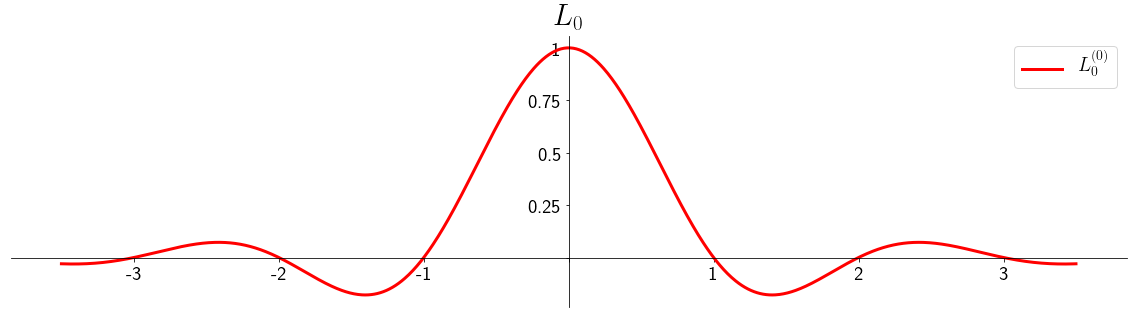

In [362]:
### Solve the system
# The system MA = B
m = 3

def S_1(x):
    lbda, A = deig[(m,r,1)]
    if 0 <= x and x < 1:
        return A[0]*x**5 + 5*A[1]*x**4 + 10*A[2]*x**3 + 10*A[3]*x**2+5*A[4]*x
    else:
        p = np.int(np.floor(x))
        return lbda**p*(A[0]*(x-p)**5 + 5*A[1]*(x-p)**4 + 10*A[2]*(x-p)**3 + 10*A[3]*(x-p)**2+5*A[4]*(x-p))
                        
def S_2(x):
    lbda, A = deig[(m,r,2)]
    if 0 <= x and x < 1:
        return A[0]*x**5 + 5*A[1]*x**4 + 10*A[2]*x**3 + 10*A[3]*x**2+5*A[4]*x
    else:
        p = np.int(np.floor(x))
        return lbda**p*(A[0]*(x-p)**5 + 5*A[1]*(x-p)**4 + 10*A[2]*(x-p)**3 + 10*A[3]*(x-p)**2+5*A[4]*(x-p))

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))
X = np.linspace(-3.5, 3.5, 1000)

M = np.array([[1,1,1,-S_1(1),-S_2(1)],
              [2,4,5,-d_operator(S_1, 1, 1), -d_operator(S_2, 1, 1)], 
              [2,12,20,-d_operator(S_1, 1, 2), -d_operator(S_2, 1, 2)], 
              [0,24,60,-d_operator(S_1, 1, 3), -d_operator(S_2, 1, 3)], 
              [0,24,120,-d_operator(S_1, 1, 4), -d_operator(S_2, 1, 4)]])
B = np.array([-1,0,0,0,0])
A = np.linalg.inv(M).dot(B)
print("Coefficients L_%d %s" % (s, A))

def funspl(x):
    if 0 <= x and x < 1:
        return 1 + A[0]*x**2 + A[1]*x**4 + A[2]*x**5
    elif x >= 1:
        return A[3]*S_1(x) + A[4]*S_2(x)
    else:
        return funspl(-x)

for rho in range(1):
    Y =  [d_operator(funspl, x, rho) for x in X]
    ax.plot(X, Y, lw=3, ls=lines[rho], color='red', label=r"$L_{%d}^{(%d)}$" % (0, rho))

format_ax(ax, title=r'$L_%s$' % 0, loc='upper right')
plt.show(fig)

### Case $r=2$

In [363]:
r=2

If $m=2$, $L_0, L_1$ are compactly suppported in $[-1,1]$ with
\begin{align*}
  L_0(x) &= 
 \begin{cases}
    1 + a_{1,0} x^2 + a_{2,0}x^3 & \text{if} \ 0 \leq x \leq 1 \\
    0 & \text{if} \  x \geq 1 \\
  \end{cases} \\
 L_1(x) &= 
 \begin{cases}
    x + a_{1,1} x^2 + a_{2,1}x^3 & \text{if} \ 0 \leq x \leq 1 \\
    0 & \text{if} \  x \geq 1 \\
  \end{cases} \\
\end{align*}
and the coefficients satisfy
\begin{equation*}
 \begin{array}{rcl}
 a_{1,0} + a_{2,0} & = & -1  \\
 2a_{1,0} + 3a_{2,0} & = & 0 \\
\end{array}
\end{equation*}
and 
\begin{equation*}
\begin{array}{rcl}
 a_{1,1} + a_{2,1} & = & -1  \\
 2a_{1,1} + 3a_{2,1} & = & -1 \\
\end{array}
\end{equation*}

Coefficients L_0 [-3.  2.]
Coefficients L_0 [-2.  1.]


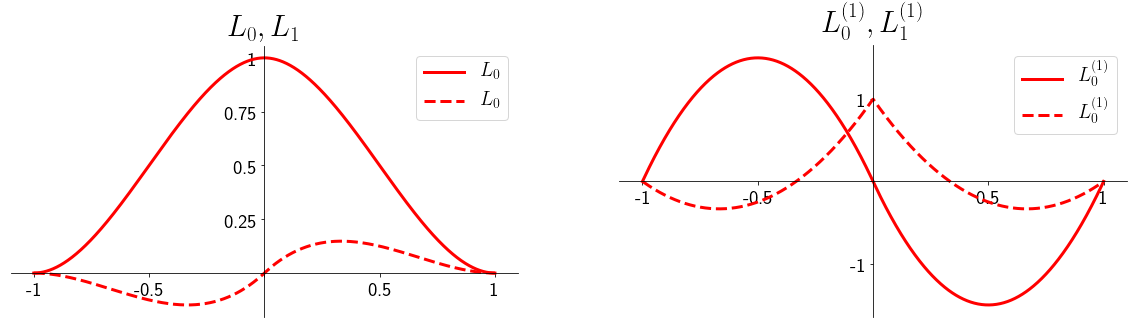

In [375]:
### Solve the system
# The system MA = B
m = 2

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
X = np.linspace(-1, 1, 1000)

for s in range(r):
    M = np.array([[1,1], [2,3]])
    B = np.array([-1,-delta(s,1)])
    A = np.linalg.inv(M).dot(B)
    print("Coefficients L_%d %s" % (0, A))

    def funspl(x):
        if 0 <= x and x < 1:
            if s==0:
                return 1 + A[0]*x**2 + A[1]*x**3
            else:
                return x + A[0]*x**2 + A[1]*x**3
        elif x >= 1:
            return 0
        else:
            return (-1)**s*funspl(-x)

    for rho in range(2):
        Y =  [d_operator(funspl, x, rho) for x in X]
        if rho==0:
            ax[rho].plot(X, Y, lw=3, ls=lines[s], color='red', label=r"$L_{%d}$" % (0))
        else:
            ax[rho].plot(X, Y, lw=3, ls=lines[s], color='red', label=r"$L_{%d}^{(%d)}$" % (0, rho))

for rho in range(r):
    if rho==0:
        title = r'$L_{%d}, L_{%d}$' % (0, 1)
    else:
        title = r'$L_{%d}^{(%d)}, L_{%d}^{(%d)}$' % (0, rho, 1, rho)
    format_ax(ax[rho], title=title, loc='upper right')
fig.savefig("../report/images/fundspline_r%d_m%d.png" % (r, m))
plt.show(fig)

If $m=3$, $L_0, L_1$ are infinitely supported with
\begin{align*}
  L_0(x) &= 
 \begin{cases}
    1 + a_{1,0} x^2 + a_{2,0}x^4 + a_{3,0}x^5 & \text{if} \ 0 \leq x \leq 1 \\
    c_{1,0} S_1 & \text{if} \  x \geq 1 \\
  \end{cases} \\
 L_1(x) &= 
 \begin{cases}
    x + a_{1,1} x^3 + a_{2,1}x^4 + a_{3,1}x^5 & \text{if} \ 0 \leq x \leq 1 \\
    c_{1,1} S_1 & \text{if} \  x \geq 1 \\
  \end{cases} \\
\end{align*}
and the coefficients satisfy
\begin{equation*}
\begin{array}{rcl}
 a_{1,0} + a_{2,0} + a_{3,0} - c_{1,0} S_1(1) & = & -1  \\
 2a_{1,0} + 4a_{2,0} + 5a_{3,0} - c_{1,0} S_1^{(1)}(1) & = & 0 \\
 2a_{1,0} + 12a_{2,0} + 20a_{3,0} - c_{1,0} S_1^{(2)}(1) & = & 0 \\
 24a_{2,0} + 60a_{3,0} - c_{1,0} S_1^{(3)}(1) & = & 0 
\end{array}
\end{equation*}
and 
\begin{equation*}
\begin{array}{rcl}
 a_{1,1} + a_{2,1} + a_{3,1} - c_{1,1} S_1(1) & = & -1  \\
 3a_{1,1} + 4a_{2,1} + 5a_{3,1} - c_{1,1} S_1^{(1)}(1) & = & -1 \\
 6a_{1,1} + 12a_{2,1} + 20a_{3,1} - c_{1,1} S_1^{(2)}(1) & = & 0 \\
 a_{1,1} + 24a_{2,1} + 60a_{3,1} - c_{1,1} S_1^{(3)}(1) & = & 0 
\end{array}
\end{equation*}

In [394]:
from scipy import special

Coefficients L_0 [-2.92877426  3.78632282 -1.85754856 14.14765751]
Coefficients L_1 [-6.20028245  8.40056489 -3.20028244 -2.33466319]


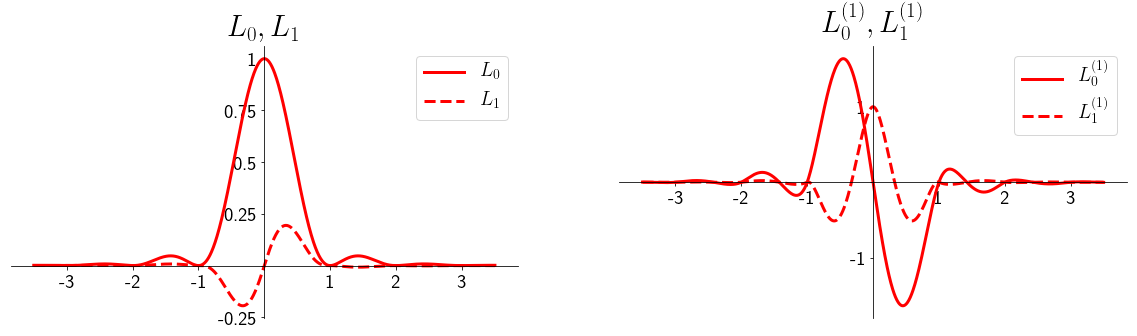

In [395]:
### Solve the system
# The system MA = B
m = 3

def S_1(x):
    lbda, A = deig[(m,r,1)]
    if 0 <= x and x < 1:
        val = 0
        for l in range(2*m-r):
            val += special.binom(2*m-1, l)*A[l]*x**(2*m-1-l)
        return val
    else:
        p = np.int(np.floor(x))
        val = 0
        for l in range(2*m-r):
            val += special.binom(2*m-1, l)*A[l]*(x-p)**(2*m-1-l)
        return lbda**p*val
                        

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
X = np.linspace(-3.5, 3.5, 1000)

for s in range(r):
    if s==0:
        M = np.array([[1,1,1,-S_1(1)],
                      [2,4,5,-d_operator(S_1, 1, 1)], 
                      [2,12,20,-d_operator(S_1, 1, 2)], 
                      [0,24,60,-d_operator(S_1, 1, 3)]])
    elif s==1:
        M = np.array([[1,1,1,-S_1(1)],
                      [3,4,5,-d_operator(S_1, 1, 1)], 
                      [6,12,20,-d_operator(S_1, 1, 2)], 
                      [1,24,60,-d_operator(S_1, 1, 3)]])
        
    B = np.array([-1,-delta(s,1),0,0])
    A = np.linalg.inv(M).dot(B)
    print("Coefficients L_%d %s" % (s, A))

    def funspl(x):
        if 0 <= x and x < 1:
            if s==0:
                return 1 + A[0]*x**2 + A[1]*x**4 + A[2]*x**5
            else:
                return x + A[0]*x**3 + A[1]*x**4 + A[2]*x**5
        elif x >= 1:
            return A[3]*S_1(x)
        else:
            return (-1)**s*funspl(-x)
        
    for rho in range(2):
        Y =  [d_operator(funspl, x, rho) for x in X]
        if rho==0:
            ax[rho].plot(X, Y, lw=3, ls=lines[s], color='red', label=r"$L_{%d}$" % (s))
        else:
            ax[rho].plot(X, Y, lw=3, ls=lines[s], color='red', label=r"$L_{%d}^{(%d)}$" % (s, rho))

for rho in range(r):
    if rho==0:
        title = r'$L_{%d}, L_{%d}$' % (0, 1)
    else:
        title = r'$L_{%d}^{(%d)}, L_{%d}^{(%d)}$' % (0, rho, 1, rho)
    format_ax(ax[rho], title=title, loc='upper right')
    
fig.savefig("../report/images/fundspline_r%d_m%d.png" % (r, m))
plt.show(fig)

In [396]:
3072/32

96.0